# Voorbeeld: Waaiers parabolen
Bij het spuiten met een tuinslang, bij fonteinen en bij het blussen van een
brand door de brandweer zie je waterstralen. Hoe hoog en hoe ver die
komen hangt af van de druk van het water en onder welke hoek het water
de spuitmond verlaat. <br>

Als we aannemen dat de waterstraal de paraboolvorm
heeft, dan kunnen we bijvoorbeeld berekenen waar de toppen van de
parabolen liggen als de hoek hetzelfde blijft en we de druk variëren.
Bij de volgende vragen ga je onderzoeken waar de
toppen van de bergparabolen liggen die onder dezelfde
hoek door de oorsprong gaan. In de figuur hiernaast zie
je enkele van deze parabolen. <br>
    
De algemene formule van de parabolen die onder een
hoek van ongeveer 76° door de oorsprong gaan is $y = ax^2 + 4x$.

* Neem $a = −1$. Teken de parabool en geef de coördinaten van de top.
* Doe hetzelfde voor $a = −2$ en $a = \frac{1}{2}$.
* Op welke grafiek liggen de toppen van de parabolen die je nu hebt getekend? Controleer of dit ook geldt voor een andere parabool vande vorm $y = ax^2 + 4x$.

De parabolen van de vorm $y = ax^2 + 6x$ gaan allemaal onder een hoek
van ongeveer 81° door de oorsprong.

* Onderzoek op welke grafiek de toppen van deze parabolen liggen
* Op welke grafiek liggen de toppen van de parabolen van de vorm $y = ax^2 − 3x$ denk je? Controleer je antwoord door voor a enkele waarden te nemen.

Elke parabool van de vorm $y = −x^2 + bx$ gaat door de oorsprong, waarbij de hoek waaronder de parabool door de oorsprong gaat afhangt van b.
* Onderzoek of je ook iets kunt zeggen van de toppen van de parabolen $y = −x^2 + bx$ en stel zo mogelijk de formule op van de grafiek waarop de toppen liggen.
* Doe hetzelfde voor de toppen van de parabolen $y = -\frac{1}{2} x^2 + bx$.


In [29]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_notebook, output_file, show

x = np.linspace(-10, 10, 500)
y1 = -x**2 + 4*x
y2 = -x**2
dimension1 = 400 #plot_width=dimension1, plot_height=dimension1, 
source = ColumnDataSource(data=dict(x=x, y1=y1, y2=y2))

p = figure(toolbar_location="left", match_aspect=True, aspect_scale=0.5)
p.line('x', 'y1', source=source, line_width=3, line_alpha=0.6, line_color="blue", line_dash="solid")
p.line('x', 'y2', source=source, line_width=3, line_alpha=0.6, line_color="red", line_dash="solid")

p.outline_line_width = 7
p.outline_line_alpha = 1
p.outline_line_color = "black"

a_slider = Slider(start=-4, end=2, value=-1, step=.5, title="a")
b_slider = Slider(start=-3, end=10, value=2, step=1, title="b")

callback = CustomJS(args=dict(source=source, a=a_slider, b=b_slider),
                    code="""
    const data = source.data;
    const A = a.value;
    const B = b.value;
    const x = data['x'];
    const y1 = data['y1'];
    const y2 = data['y2'];

    for (var i = 0; i < x.length; i++) {
        y1[i] = A*x[i]**2 + B*x[i];
        y2[i] = -A*x[i]**2;
    }
    source.change.emit();
""")

a_slider.js_on_change('value', callback)
b_slider.js_on_change('value', callback)

layout = row(
    p,
    column(a_slider, b_slider),
)

p.xaxis.axis_label = "x"
p.xaxis.axis_label_text_color = "black"
p.xaxis.axis_label_text_font_size = "32px"

p.yaxis.axis_label = "y"
p.yaxis.axis_label_text_color = "black"
p.yaxis.axis_label_text_font_size = "32px"
# p.yaxis.major_label_orientation  = "vertical"

# p.yaxis.axis_label = r"\[y\]"
# p.xaxis.axis_label = r"\[x\]"

p.xgrid.visible = False
p.ygrid.visible = False

p.xaxis.major_tick_line_color = "black"
p.xaxis.major_tick_line_width = 3
p.xaxis.minor_tick_line_width = 0
p.xaxis.major_label_text_font_size = "16px"
p.xaxis.major_label_text_font_style = "bold"


p.yaxis.major_tick_line_color = "black"
p.yaxis.major_tick_line_width = 3
p.yaxis.minor_tick_line_width = 0
p.yaxis.major_label_text_font_size = "16px"
p.xaxis.major_label_text_font_style = "bold"

p.toolbar.logo = None

p.x_range.start = 0
p.x_range.end = 10

p.y_range.start = 0
p.y_range.end = 10
output_notebook(hide_banner=True)

show(layout)

In de volgende video wordt uitgelegd wat een parabool precies is. 

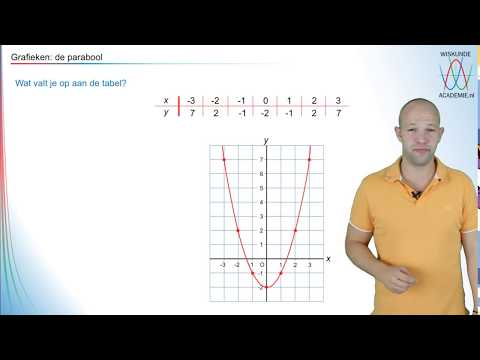

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('-HpjPw3ZGoI', width=720, height=480) 

In [2]:
import pandas as pd
pd.options.plotting.backend = "plotly"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = df.plot(title="Economie voorbeeld", template="simple_white",
              labels=dict(index="Tijd", value="geld", variable="optie"))
fig.update_yaxes(tickprefix="$")
fig.show()

In [1]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],
    y=[0, 1, 4, 9, 16],
    name="y = x^2"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[2, 3, 4, 5, 6, 7, 8, 9, 10],
    name="lijn: y = x + 2"
))

fig.update_layout(
    title="Titel",
    xaxis_title="X as",
    yaxis_title="Y as ",
    legend_title="Legenda",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

In [3]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
np.random.seed(1)

df = pd.DataFrame(dict(
    a=np.random.normal(loc=1, scale=2, size=100),
    b=np.random.normal(loc=2, scale=1, size=100)
))
fig = df.boxplot()
fig.show()

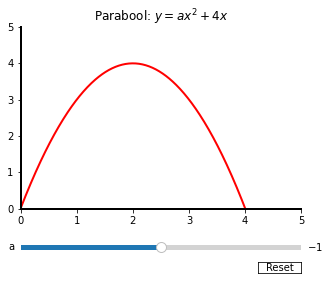

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, RangeSlider

plt.close('all')

fig, ax3 = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
ax3.set_xlim([0, 5])
ax3.set_ylim([0, 5])
ax3.grid(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
  ax3.spines[axis].set_linewidth(2)
ax3.set_title('Parabool: $y=ax^2 + 4x$')

x = np.arange(0.0, 10, 0.01)

a0 = -1
delta_a = 0.5
y = a0*x**2 + 4*x
l, = plt.plot(x, y, c='red', lw=2)
ax3.margins(x=0)

axcolor = 'white'
axa = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

sa = Slider(axa, 'a', -4, 2, valinit=a0, valstep=delta_a)

def update(val):
    a = sa.val
    l.set_ydata(a*x**2 + 4*x)
    fig.canvas.draw_idle()

sa.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sa.reset()
button.on_clicked(reset)

plt.show()